<a href="https://colab.research.google.com/github/Steven-A3/DeepLearningZeroToAllColab/blob/master/Kaggle_practice_Bank_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Kaggle practice - [Bank Marketing](https://www.kaggle.com/janiobachmann/bank-marketing-dataset)
- Find the best strategies to improve for the next marketing campaign. 

## 01. 환경설정
### 패키지

In [0]:
import pandas as pd   # 데이터 프레임을 다루기 위한 패키지
import numpy  as np   # 수학 연산을 위한 패키지
import seaborn as sns # 시각화 패키지
import matplotlib.pyplot as plt # 시각화를 위한 패키지

#### 구글 드라이브 & 코랩 설정

In [361]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## 02. 데이터

#### **`Pandas`**를 이용하여 데이터를 불러오고 확인

In [362]:
df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


#### 데이터 크기 확인
  - 17개의 변수를 가진 11,162건의 데이터

In [363]:
df.shape

(11162, 17)

#### 결측치 확인
- 결측치(Missing value, NA(Not Available)): 누락된 값 / 비어있는 값
   - 결측치가 포함된 행 제거하고 분석
   - 평균값 등으로 결측치를 채우고 분석 (Imputation)
   - kNN(k-Nearest Neighborhood) Imputation 등 다양한 Imputation 방법 존재

In [364]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

## 03. 탐색적 분석(EDA, Exploratory Data Analysis)
- 본격적인 데이터 분석에 앞서, 데이터를 확인하는 과정

#### **`deposit`**: has the client subscried a term deposit?
- 분석을 통해 예측해야 하는 값(종속변수, dependent variable, Y variable ...)
- No / Yes 값을 가진 범주형 변수(Categorical variable)

In [365]:
df.deposit.value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

- 막대 그래프

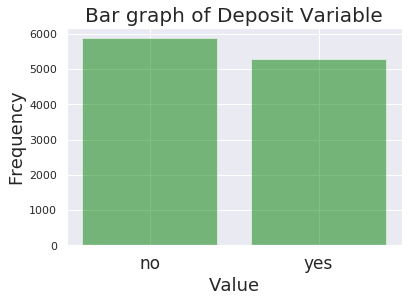

In [366]:
plt.bar( x=["no", "yes"], # x값을 지정
         height=df.deposit.value_counts(), # y값을 지정
         color="green", # 색상 지정
         alpha=0.5)     # 투명도 지정

plt.title("Bar graph of Deposit Variable", fontsize=20) # 그래프 제목을 지정. 글자크기 20
plt.xlabel("Value", fontsize=18)       # x축 label을 지정. 글자크기 18
plt.ylabel("Frequency", fontsize=18)   # y축 label을 지정. 글자크기 18
plt.xticks(["no", "yes"], fontsize=17) # x값에 표시되는 값 변경. 글자크기를 17로 변환
plt.show() # 출력

#### **`balance`**: balance of the individual
- 수치형 변수(Numerical variable)

- **`describe()`** 함수를 활용한 통계량 확인
   - 잔액이 0보다 작을 수 없으므로 -6847 등 잘못된 값이 존재

In [367]:
df.balance.describe()

count    11162.000000
mean      1528.538524
std       3225.413326
min      -6847.000000
25%        122.000000
50%        550.000000
75%       1708.000000
max      81204.000000
Name: balance, dtype: float64

- 히스토그램(Histogram)

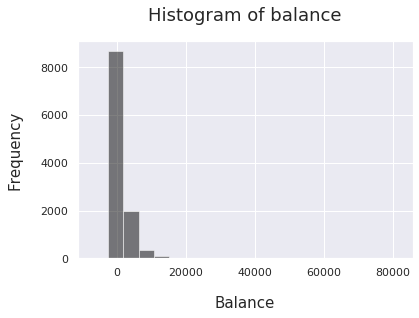

In [368]:
plt.hist(df.balance,    # 히스토그램을 그릴 값을 지정
         bins=20,       # 히스토그램의 구간 개수를 지정 
         color="black",  # 색상 지정
         alpha=.5)      # 투명도 지정
plt.title("Histogram of balance", fontsize=18, pad=20) # 그래프 제목을 지정. pad 변수를 사용하여 그래프와의 거리 조절
plt.xlabel("Balance",   fontsize=15, labelpad=18) # x축 라벨을 지정. 글자크기 15. labelpad를 사용하여 그래프와의 거리 조절
plt.ylabel("Frequency", fontsize=15, labelpad=18)
plt.show()

#### **`pdays`**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- 전체 데이터 중 약 75%가 같은 값을 가짐

In [370]:
df["pdays"].value_counts()

-1      8324
 92      106
 182      89
 91       84
 181      81
        ... 
 587       1
 579       1
 515       1
 491       1
 683       1
Name: pdays, Length: 472, dtype: int64

In [371]:
len(df.loc[df["pdays"]==-1]) / len(df)

0.745744490234725

#### **`housing`**: has housing loan?
- No / Yes 값을 가진 범주형 변수(Categorical variable) 

In [372]:
df.housing.value_counts()

no     5881
yes    5281
Name: housing, dtype: int64


- Y 변수에 따른 막대 그래프
  - **`seaborn`** 시각화 패키지 이용
  - **`housing`** 변수가 yes이면 **`deposit`** 변수가 no인 경우가 많다
  - **`housing`** 변수가 no이면 **`deposit`** 변수가 yes인 경우가 많다

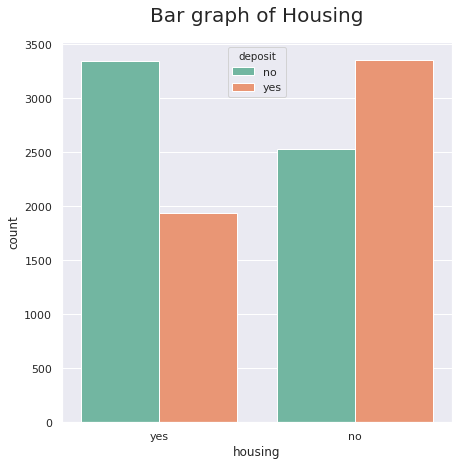

In [373]:
plt.figure(figsize=(7, 7)) # 그래프 사이즈 지정
sns.set(style="darkgrid")  # 그래프 스타일 지정
sns.countplot(x="housing", # 그래프를 그릴 변수 지정
              data=df,     # 데이터프레임 지정
              hue="deposit", # Y 변수 지정
              hue_order=["no", "yes"], # Y 변수가 표시될 순서 지정
              palette="Set2") # 색깔 Set 지정

plt.title("Bar graph of Housing", fontsize=20, pad=20)
plt.show()

#### **`Pairplot`**
- **`Pairplot`**은 데이터프레임을 인수로 받아 그리드(grid) 형태로 각 데이터 열의 조합에 대해 산점도를 그린다.
- 같은 데이터가 만나는 대각선 영역에는 해당 데이터의 히스토그램을 그린다.
- **`hue`** 변수에 카테고리 변수 이름을 지정하여 카테고리 값에 따라 색상을 다르게 할 수 있다.

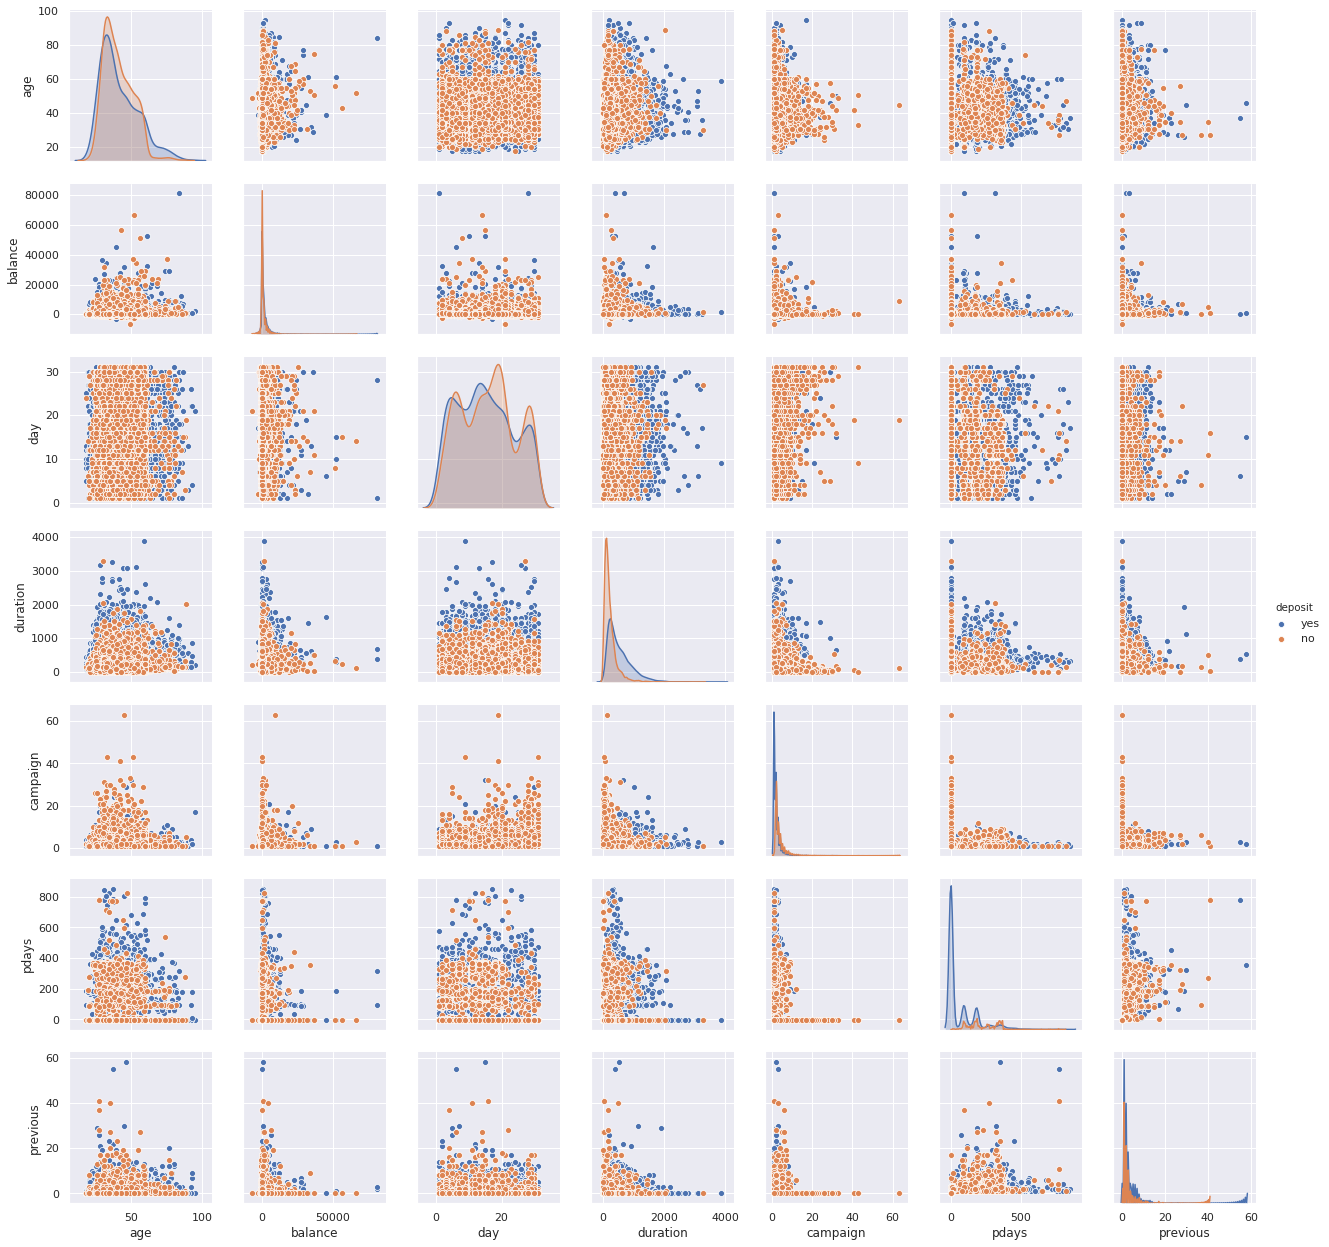

In [0]:
sns.pairplot(df, hue="deposit")

## 04. 전처리(Pre-processing)

#### **`pdays`**: 전체 데이터 중 75%가 같은 값을 가지므로 binary 변수로 변환
- 임시 변수 **`tmp`** 선언

In [0]:
df["tmp"] = None

- **`pdays`**의 값이 -1이면, tmp의 값을 no_contact, -1이 아니면 tmp의 값을 contact로 저장

In [0]:
df.loc[df["pdays"]==-1, "tmp"] = "no_contact"
df.loc[df["pdays"]!=-1, "tmp"] = "contact"

- **`pdays`** 변수와 **`tmp`** 변수 확인

In [376]:
df[["pdays", "tmp"]]

,pdays,tmp
0,-1,no_contact
1,-1,no_contact
2,-1,no_contact
3,-1,no_contact
4,-1,no_contact
...,...,...
11157,-1,no_contact
11158,-1,no_contact
11159,-1,no_contact
11160,172,contact


- **`pdays`**를 **`tmp`**로 대체후 **`tmp`** 변수 삭제

In [0]:
df["pdays"] = df["tmp"]
df.drop(["tmp"], axis=1, inplace=True)

#### **`pd.get_dummies()`** 함수를 사용하여 범주형 변수 전처리
- **`pd.get_dummies()`** 함수에 데이터프레임 이름과 해당 데이터 프레임의 범주형 변수 이름을 전달하면 더미처리 된 데이터 프레임을 반환

- **`더미변수(dummy variable) or 가변수`**는 0 또는 1만으로 표현되는 값으로 어떤 특징이 존재하는가 존재하지 않는가를 표시하는 독립변수다.

In [0]:
df = pd.get_dummies(df, columns=["job", "marital", "education", "default",
                                 "housing", "loan", "contact", "month", "day", "pdays", "poutcome"], drop_first=False)

- 더미변수가 포함된 데이터 프레임의 첫번째 행을 살펴보면, **`job`**과 관련된 변수 중 **`job_admin.`**만 1인 것으로 보아 이 고객의 직업은 admin.이다 

In [379]:
df.head()

,age,balance,duration,campaign,previous,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,...,month_nov,month_oct,month_sep,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,pdays_contact,pdays_no_contact,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,1042,1,0,yes,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,56,45,1467,1,0,yes,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,41,1270,1389,1,0,yes,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,55,2476,579,1,0,yes,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,54,184,673,2,0,yes,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


#### 훈련(Training) / 시험(Test)셋 나누기

- Y값을 데이터프레임에서 떼어냄

In [0]:
X = df.drop(["deposit"], axis=1)
y = df["deposit"]

- **`train_test_split()`** 함수를 사용하여 훈련 셋과 시험 셋을 나눈다.
- **`stratify`** 매개변수에 y를 지정하면 원래 데이터프레임의 y 분포의 비율을 고려하면서 훈련 셋과 시험 셋을 나누어준다

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [381]:
print("Shape of train_x:", train_x.shape)
print("Shape of train_y:", train_y.shape)
print("Shape of text_x: ", test_x.shape)
print("Shape of text_y: ", test_y.shape)

Shape of train_x: (8929, 71)
Shape of train_y: (8929,)
Shape of text_x:  (2233, 71)
Shape of text_y:  (2233,)


#### 표준화(Standardization)
- 변수들의 범위(스케일, Scale)을 일정하게 맞춰주는 작업
- **`test`**셋도 **`train`**셋에서 사용한 Sclaer를 통해 변환해주어야 한다.

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

## 모델링 - 로지스틱 회귀(Logistic regression)

In [385]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [386]:
print("Train Accuracy:",  model.score(X_train_scaled, y_train))
print("Test  Accuracy:",  model.score(X_test_scaled, y_test))

Train Accuracy: 0.833240004479785
Test  Accuracy: 0.8266905508284819


- 모델 객체의 **`predict()`** 함수를 사용하여 test셋에 대한 y값을 예측

In [388]:
pred = model.predict(X_test_scaled)
pred

array(['yes', 'yes', 'yes', ..., 'yes', 'yes', 'yes'], dtype=object)

## 모델 평가(Evaluation)
- [혼동 행렬(Confusion matrix)](https://datascienceschool.net/view-notebook/731e0d2ef52c41c686ba53dcaf346f32/)

In [389]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[992, 183],
       [204, 854]])

In [390]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred, target_names=["class 0", "class 1"]))

              precision    recall  f1-score   support

     class 0       0.83      0.84      0.84      1175
     class 1       0.82      0.81      0.82      1058

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.83      0.83      0.83      2233

